## Multi-Armed Bandits

In [ ]:
# Import required packages
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

In [ ]:
df = pd.read_csv('.\dataset.csv')
np.savetxt(r'.\data.txt', df.values)

In [56]:
# Cumulative Take Rate
def calc_CTR(reward,ctr_num,ctr_den):
    ctr_num = ctr_num + reward
    ctr_den = ctr_den + 1
    
    return (ctr_num/ctr_den,ctr_num,ctr_den)

In [57]:
#LinUCB Algo
def linUCB(data,alpha):
    CTR={}
    A={}
    b={}
    
    ucb={}
    arm_pred={}
    correct_pred={}
    ucb_mean={}
    coeff={}
    
    for arm in range(1,11):
        A[arm] = np.identity(100)
        b[arm] = np.atleast_2d(np.zeros(100)).T
        
        arm_pred[arm] = 0
        correct_pred[arm] = 0
        ucb_mean[arm] = 0
    
    time=1
    ctr_num=0
    ctr_den=0
    
    for line in data:

        # Fetch individual values to perform operations on them
        values = line.split()

        # Convert all strings in the list to integer
        values = list(map(int, values))

        # Get the Arm - which is the action performed
        curr_arm = values.pop(0)

        # Get reward for the current action
        reward = values.pop(0)

        # Create the context array
        context = np.asarray(values)

        # Loop to update coefficient and calculate pay off for each arm
        for arm in range(1,11):
            # Calculate the coefficent, standard deviation and UCB for the arm
            coeff[arm] = np.dot(np.linalg.inv(A[arm]), b[arm])
            standard_deviation = np.sqrt(np.dot(context.T, np.dot(np.linalg.inv(A[arm]), context)))


                # Method 2 - Time Dependent Alpha
            ucb[arm] = np.asscalar(np.dot(coeff[arm].T, context) + np.dot((1/time**0.5), standard_deviation))

            ucb_mean[arm] += ucb[arm]

        # Choose the arm with largest UCB
        pred_arm = np.argmax(list(ucb.values())) + 1

        # Count of Predicted Arm
        arm_pred[curr_arm] += 1

        # If the prediction matches the current arm, calculate CTR and update values
        if(curr_arm == pred_arm):
            # Update matrix A and B
            A[curr_arm] = A[curr_arm] + np.outer(context, context)
            b[curr_arm] = b[curr_arm] + reward * np.reshape(context,(100,1))
            # Call calculate CTR function
            curr_CTR, ctr_num, ctr_den = calc_CTR(reward, ctr_num, ctr_den)
            # Store the CTR at current time stamp
            CTR[time] = curr_CTR
            correct_pred[curr_arm] += 1


        # Increment the time step
        time += 1

    # *****   LinUCB Algorithm Ends and Graph Plotting begins here   *****
    # Calculate the mean UCB for each arm
    for arm in range(1,11):
        ucb_mean[arm] = ucb_mean[arm]/time

        
    lists = sorted(ucb_mean.items())
    x, y = zip(*lists)
    plt.plot(x, y, label = 'Standard Deviation')
    plt.bar(np.arange(len(ucb_mean)) + 1, list(ucb_mean.values()), align='center', color = 'b', label = 'UCB')
    ax = plt.gca()
    ax.set_xlabel('X axis (arm) ->')
    ax.set_ylabel('Y axis (UCB) ->')
    ax.set_title('Mean Upper Confidence Bound (Per Arm)')
    ax.grid(True, linestyle='-.')
    ax.set_xticks(np.arange(1, 11, 1))
    plt.show()    
    
    return CTR

In [58]:
# Visualizing the results
def plotCTR(CTR):

    lists = sorted(CTR.items())
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(x, y, label = 'alpha = 1/sqrt(t)', color = 'g')

    ax = plt.gca()
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels)
    ax.set_xlabel('X axis (time steps) ->')
    ax.set_ylabel('Y axis (CTR) ->')
    ax.set_title('Contextual Bandit Learning for Different alpha values')
    ax.grid(True, linestyle='-.')
    ax.set_yticks(np.arange(0, 1, 0.1))
    plt.show()

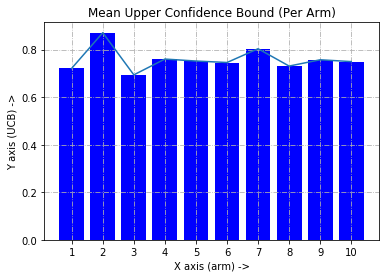

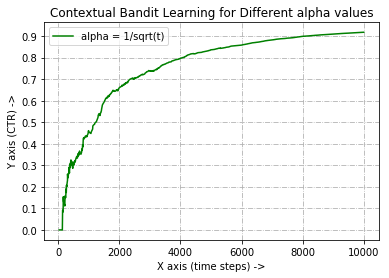

In [59]:
if __name__ == "__main__":

    with open('dataset.txt',"r") as file:
        data = [line.strip("\n") for line in file]

    CTR = linUCB(data, 0)

    #  ********** Plot the combined CTR Graphs **********
    plotCTR(CTR)